In [1]:
#Import necessary Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Read data
df = pd.read_csv(r"anova.csv")

## Basic Sanity Checks

In [3]:
df.shape

(20, 3)

In [4]:
df.head(5)

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fert    20 non-null     object 
 1   Water   20 non-null     object 
 2   Yield   20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


In [6]:
transformed=df.Yield.transform(func = ['sqrt', 'exp']) 

In [7]:
transformed

,sqrt,exp
0,5.234501,7.937227e+11
1,5.796551,3.911061e+14
2,5.458938,8.749345e+12
3,5.932959,1.937161e+15
4,5.744563,2.146436e+14
5,5.899152,1.298518e+15
6,5.196152,5.320482e+11
7,5.495453,1.305249e+13
8,5.549775,2.378319e+13
9,5.138093,2.919943e+11


In [8]:
df[['sqrt', 'exp']] = transformed

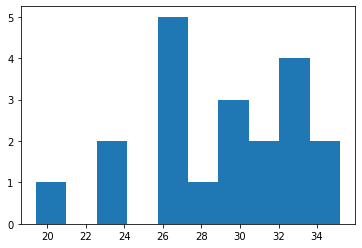

In [9]:
plt.hist((df.Yield))
plt.show()

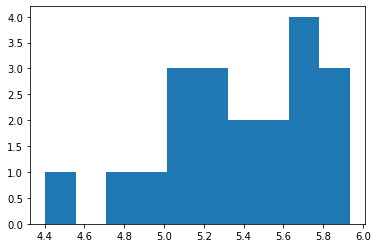

In [10]:
plt.hist((transformed.sqrt))
plt.show()

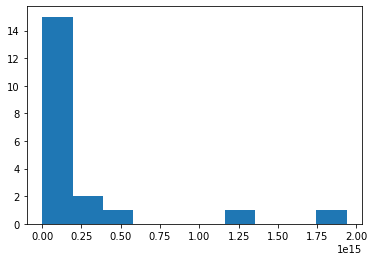

In [11]:
plt.hist((transformed.exp))
plt.show()

In [12]:
df['log_transform'] = np.log(df['Yield'])

In [13]:
df.head()

,Fert,Water,Yield,sqrt,exp,log_transform
0,A,High,27.4,5.234501,7.937227e+11,3.310543
1,A,High,33.6,5.796551,3.911061e+14,3.514526
2,A,High,29.8,5.458938,8.749345e+12,3.394508
3,A,High,35.2,5.932959,1.937161e+15,3.561046
4,A,High,33.0,5.744563,2.146436e+14,3.496508


(array([1., 0., 0., 2., 1., 5., 1., 3., 3., 4.]),
 array([2.96527307, 3.02485037, 3.08442767, 3.14400497, 3.20358227,
        3.26315957, 3.32273688, 3.38231418, 3.44189148, 3.50146878,
        3.56104608]),
 <BarContainer object of 10 artists>)

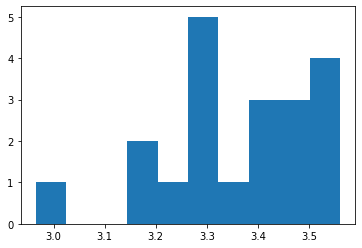

In [14]:
plt.hist(df['log_transform'])

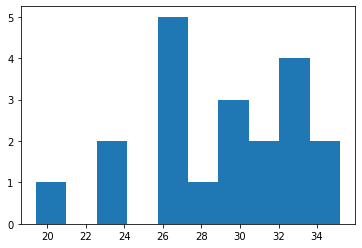

In [15]:
plt.hist((df.Yield))
plt.show()

In [16]:
df.groupby('Fert')["Yield"].sum()

Fert
A    309.0
B    271.8
Name: Yield, dtype: float64

In [17]:
df.groupby('Water')["Yield"].mean()

Water
High    30.82
Low     27.26
Name: Yield, dtype: float64

In [24]:
df.groupby('Water').agg(['min', 'max'])

Fert     Yield            sqrt                     exp                \
       min max   min   max       min       max           min           max   
Water                                                                        
High     A   B  26.4  35.2  5.138093  5.932959  2.919943e+11  1.937161e+15   
Low      A   B  19.4  33.4  4.404543  5.779273  2.662643e+08  3.202106e+14   

      log_transform            
                min       max  
Water                          
High       3.273364  3.561046  
Low        2.965273  3.508556